In [1]:
#hide
#!pip install -Uqq fastbook
#import fastbook
#fastbook.setup_book()

In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# Under the Hood: Training a Digit Classifier

## Pixels: The Foundations of Computer Vision

## Sidebar: Tenacity and Deep Learning

## End sidebar

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

`untar_data`check if the data is downloaded and unzipped

In [4]:
#hide
Path.BASE_PATH = path

In [5]:
# check the doc
# doc(path.ls)

In [6]:
path.ls()

(#3) [Path('labels.csv'),Path('train'),Path('valid')]

In [7]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [8]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [9]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [10]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [11]:
tensor(im3)[4:10,4:10] #pytorch version of numpy array

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [12]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys') #background gradient 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [13]:
pd.DataFrame(im3_t).style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys') #background gradient 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


## First Try: Pixel Similarity

create a baseline model - should work quite straight forward to test and implement

In [14]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

In [15]:
doc(show_image)

show_image [source] show_image ( im , ax = None , figsize = None , title = None , ctx = None , cmap = None , norm = None , aspect = None , interpolation = None , alpha = None , vmin = None , vmax = None , origin = None , extent = None , filternorm = True , filterrad = 4.0 , resample = None , url = None , data = None , ** kwargs ) 
 
 Show a PIL or PyTorch image on ax . 
 Show in docs

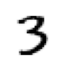

In [16]:
show_image(three_tensors[1]);

Convert list to tensors in pytorch

In [17]:
stacked_sevens = torch.stack(seven_tensors).float()/255 #divide by 255 if image is between 0 and 1
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape
# ranked 3 axis

torch.Size([6131, 28, 28])

In [18]:
len(stacked_threes.shape)

3

In [19]:
stacked_threes.ndim #equivalend axis or ndim in numpy

3

In [20]:
type(stacked_threes)

torch.Tensor

take a mean of an axis and the image is blurred

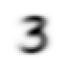

In [21]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

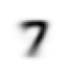

In [22]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

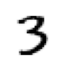

In [23]:
a_3 = stacked_threes[1]
show_image(a_3);

<b>L1 and L2 regularization</b>
- The L1 norm is the sum of the absolute values --> result to a sparser solution
     - LASSO regression, L1 regularization, includes a hyper-parameter α times the sum of the absolute value of the coefficients as penalty term in its cost function
- The L2 norm is the square root of the sum of the squared values (RMSE - root mean squared error) --> minimizing the prediction error

In [24]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [25]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [26]:
print(f'L1 norm: {F.l1_loss(a_3.float(),mean7)}\nL2 norm: {F.mse_loss(a_3,mean7).sqrt()}')

L1 norm: 0.15861910581588745
L2 norm: 0.30210891366004944


In [27]:
doc(F.l1_loss)

l1_loss [source] l1_loss ( input : Tensor , target : Tensor , size_average : Optional [ bool ]= None , reduce : Optional [ bool ]= None , reduction : str = 'mean' ) 
 
 l1_loss(input, target, size_average=None, reduce=None, reduction='mean') -> Tensor 
 Function that takes the mean element-wise absolute value difference. 
 See :class: ~torch.nn.L1Loss for details.

### NumPy Arrays and PyTorch Tensors

In [28]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [29]:
arr  # numpy

array([[1, 2, 3],
       [4, 5, 6]])

In [30]:
tns  # pytorch

tensor([[1, 2, 3],
        [4, 5, 6]])

In [31]:
tns[1]

tensor([4, 5, 6])

In [32]:
tns[:,1]

tensor([2, 5])

In [33]:
tns[1,1:3]

tensor([5, 6])

In [34]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [35]:
tns.type()

'torch.LongTensor'

In [36]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

## Computing Metrics Using Broadcasting

In [37]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [38]:
def mnist_distance(a,b): 
    '''broadcasting for finding distance between 2 arrays a and b 
    a: array/tensor
    b: array/tensor
    '''
    return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [39]:
valid_3_tens.shape

torch.Size([1010, 28, 28])

In [40]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1539, 0.1557, 0.1479,  ..., 0.1123, 0.1295, 0.1183]),
 torch.Size([1010]))

In [41]:
tensor([1,2,3]) + tensor([1,1,1])

tensor([2, 3, 4])

In [42]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [43]:
def is_3(x): 
    return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [44]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [45]:
is_3(valid_3_tens)

tensor([ True, False,  True,  ...,  True,  True,  True])

In [46]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

## Stochastic Gradient Descent (SGD)

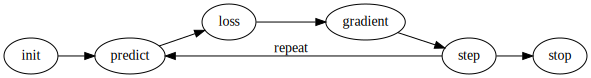

In [47]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

In [48]:
def f(x): return x**2

/home/adeuk/miniconda/envs/fastai/lib/python3.8/site-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


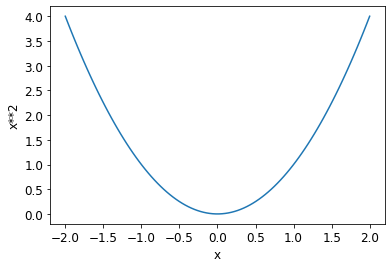

In [49]:
plot_function(f, 'x', 'x**2')

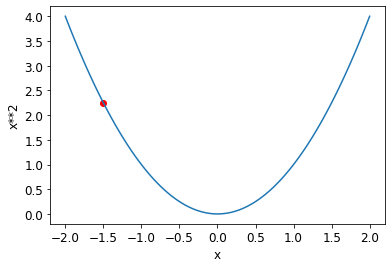

In [50]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

### Calculating Gradients

calculate slope with derivative to know how much to reduce losses 

rank 1 tensor is a vector

In [51]:
# modify tensor, tell PyTorch that we want to calculate gradients with that variable at the value with requires_grad_()
xt = tensor(3.).requires_grad_()

In [52]:
yt = f(xt)
print(yt,'\n9 with additional function')

tensor(9., grad_fn=<PowBackward0>) 
9 with additional function


In [53]:
yt.backward()

In [54]:
xt.grad

tensor(6.)

In [55]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [56]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [57]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

### Stepping With a Learning Rate

### An End-to-End SGD Example

`weights -= gradient (w) * lr`
lr = learning rate --> how much do you move from x 

In [58]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

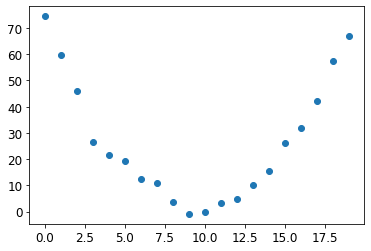

In [59]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [60]:
def f(t, params):
    '''f is a quadratic function'''
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [61]:
def mse(preds, targets): 
    return ((preds-targets)**2).mean().sqrt()

#### Step 1: Initialize the parameters

In [62]:
params = torch.randn(3).requires_grad_()

In [63]:
#hide
orig_params = params.clone()

#### Step 2: Calculate the predictions

In [64]:
preds = f(time, params)

In [65]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

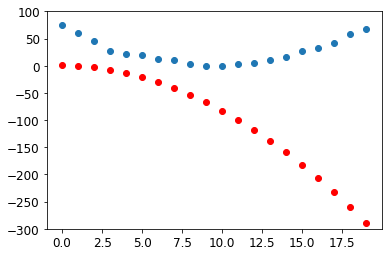

In [66]:
show_preds(preds)

#### Step 3: Calculate the loss

In [67]:
loss = mse(preds, speed)
loss

tensor(160.6979, grad_fn=<SqrtBackward>)

#### Step 4: Calculate the gradients

In [68]:
loss.backward()
params.grad

tensor([-165.5151,  -10.6402,   -0.7900])

In [222]:
params.grad * 1e-5

tensor([1.5806e-03, 1.0130e-04, 5.6961e-06])

In [223]:
params

tensor([ 0.5619, -0.0205,  0.0399], requires_grad=True)

#### Step 5: Step the weights. 

In [224]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [225]:
preds = f(time,params)
mse(preds, speed)

tensor(74.7924, grad_fn=<SqrtBackward>)

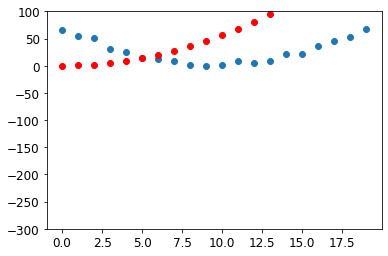

In [226]:
show_preds(preds)

In [227]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

#### Step 6: Repeat the process 

In [228]:
for i in range(10): apply_step(params)

74.79244995117188
74.54185485839844
74.29146575927734
74.04130554199219
73.7913589477539
73.54163360595703
73.2921371459961
73.0428695678711
72.79381561279297
72.54500579833984


In [229]:
#hide
params = orig_params.detach().requires_grad_()

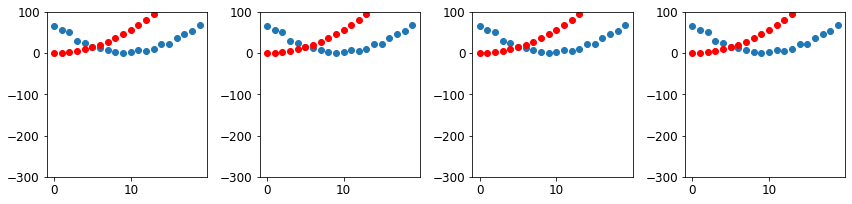

In [230]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

#### Step 7: stop

### Summarizing Gradient Descent

metric and loss function should be different

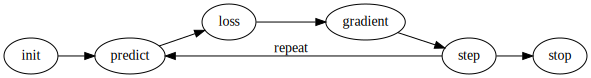

In [112]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

## The MNIST Loss Function

In [69]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [70]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [71]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [72]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [73]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

initialize weights and bias

In [74]:
weights = init_params((28*28,1))

In [75]:
bias = init_params(1)

In [76]:
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [81]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [77]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True, False, False,  ..., False, False, False],
        [ True, False, False,  ..., False, False, False],
        [ True, False, False,  ..., False, False, False],
        ...,
        [False,  True,  True,  ...,  True,  True,  True],
        [False,  True,  True,  ...,  True,  True,  True],
        [False,  True,  True,  ...,  True,  True,  True]])

In [78]:
corrects.float().mean().item()

0.5048644542694092

In [79]:
with torch.no_grad():
    weights[0] *= 1.0001

In [98]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.4912068545818329

In [99]:
(preds.float() == train_y).float().mean().item()

0.0

In [86]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [87]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [88]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [89]:
mnist_loss(prds,trgts)

tensor(0.4333)

In [90]:
mnist_loss(tensor([0.9, 0.4, 0.8]),trgts)

tensor(0.2333)

### Sigmoid

In [131]:
def sigmoid(x): return 1/(1+torch.exp(-x))

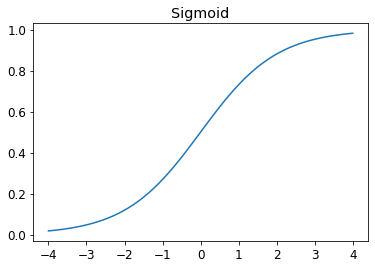

In [132]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [133]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

### SGD and Mini-Batches

In [134]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [135]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [136]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

## Putting It All Together

In [137]:
weights = init_params((28*28,1))
bias = init_params(1)

In [138]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [139]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [140]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [141]:
preds = linear1(batch)
preds

tensor([[-2.1876],
        [-8.3973],
        [ 2.5000],
        [-4.9473]], grad_fn=<AddBackward0>)

In [142]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7419, grad_fn=<MeanBackward0>)

In [143]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0061), tensor([-0.0420]))

In [144]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [145]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0121), tensor([-0.0840]))

In [146]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0182), tensor([-0.1260]))

In [147]:
weights.grad.zero_()
bias.grad.zero_();

In [148]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [149]:
(preds>0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [ True],
        [False]])

In [150]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [151]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [152]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [153]:
validate_epoch(linear1)

0.5263

In [154]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6664

In [155]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8266 0.89 0.9184 0.9276 0.9398 0.9467 0.9506 0.9525 0.956 0.9579 0.9599 0.9608 0.9613 0.9618 0.9633 0.9638 0.9647 0.9657 0.9672 0.9677 

### Creating an Optimizer

In [156]:
linear_model = nn.Linear(28*28,1)

In [157]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [158]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [159]:
opt = BasicOptim(linear_model.parameters(), lr)

In [160]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [161]:
validate_epoch(linear_model)

0.4609

In [162]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [163]:
train_model(linear_model, 20)

0.4932 0.7686 0.8555 0.9136 0.9346 0.9482 0.957 0.9634 0.9658 0.9678 0.9697 0.9717 0.9736 0.9746 0.9761 0.9771 0.9775 0.9775 0.978 0.9785 

In [164]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8179 0.8496 0.9141 0.9346 0.9482 0.957 0.9619 0.9658 0.9673 0.9692 0.9712 0.9741 0.9751 0.9761 0.9775 0.9775 0.978 0.9785 0.979 

In [165]:
dls = DataLoaders(dl, valid_dl)

In [166]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [167]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636709,0.503144,0.495584,00:00
1,0.429828,0.248517,0.777233,00:00
2,0.161680,0.155361,0.861629,00:00
3,0.072948,0.097722,0.917566,00:00
4,0.040128,0.073205,0.936212,00:00
5,0.027210,0.059466,0.950442,00:00
6,0.021837,0.050799,0.957802,00:00
7,0.019398,0.044980,0.964181,00:00
8,0.018122,0.040853,0.966143,00:00
9,0.017330,0.037788,0.968106,00:00


## Adding a Nonlinearity

In [101]:
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [102]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

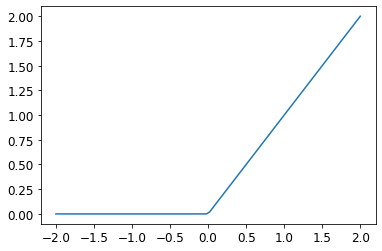

In [103]:
plot_function(F.relu)

In [171]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [172]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [173]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.333021,0.396112,0.512267,00:00
1,0.152461,0.235238,0.797350,00:00
2,0.083573,0.117471,0.911678,00:00
3,0.054309,0.078720,0.940628,00:00
4,0.040829,0.061228,0.956330,00:00
5,0.034006,0.051490,0.963690,00:00
6,0.030123,0.045381,0.966634,00:00
7,0.027619,0.041218,0.968106,00:00
8,0.025825,0.038200,0.969087,00:00
9,0.024441,0.035901,0.969578,00:00


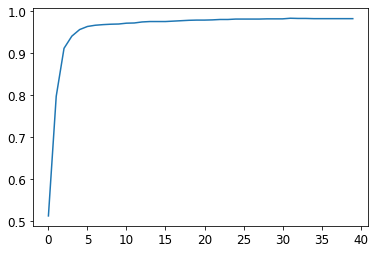

In [174]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [175]:
learn.recorder.values[-1][2]

0.98233562707901

### Going Deeper

In [176]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.086220,0.014674,0.996075,00:12


## Jargon Recap

## Questionnaire

1. How is a grayscale image represented on a computer? How about a color image?
1. How are the files and folders in the `MNIST_SAMPLE` dataset structured? Why?
1. Explain how the "pixel similarity" approach to classifying digits works.
1. What is a list comprehension? Create one now that selects odd numbers from a list and doubles them.
1. What is a "rank-3 tensor"?
1. What is the difference between tensor rank and shape? How do you get the rank from the shape?
1. What are RMSE and L1 norm?
1. How can you apply a calculation on thousands of numbers at once, many thousands of times faster than a Python loop?
1. Create a 3×3 tensor or array containing the numbers from 1 to 9. Double it. Select the bottom-right four numbers.
1. What is broadcasting?
1. Are metrics generally calculated using the training set, or the validation set? Why?
1. What is SGD?
1. Why does SGD use mini-batches?
1. What are the seven steps in SGD for machine learning?
1. How do we initialize the weights in a model?
1. What is "loss"?
1. Why can't we always use a high learning rate?
1. What is a "gradient"?
1. Do you need to know how to calculate gradients yourself?
1. Why can't we use accuracy as a loss function?
1. Draw the sigmoid function. What is special about its shape?
1. What is the difference between a loss function and a metric?
1. What is the function to calculate new weights using a learning rate?
1. What does the `DataLoader` class do?
1. Write pseudocode showing the basic steps taken in each epoch for SGD.
1. Create a function that, if passed two arguments `[1,2,3,4]` and `'abcd'`, returns `[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]`. What is special about that output data structure?
1. What does `view` do in PyTorch?
1. What are the "bias" parameters in a neural network? Why do we need them?
1. What does the `@` operator do in Python?
1. What does the `backward` method do?
1. Why do we have to zero the gradients?
1. What information do we have to pass to `Learner`?
1. Show Python or pseudocode for the basic steps of a training loop.
1. What is "ReLU"? Draw a plot of it for values from `-2` to `+2`.
1. What is an "activation function"?
1. What's the difference between `F.relu` and `nn.ReLU`?
1. The universal approximation theorem shows that any function can be approximated as closely as needed using just one nonlinearity. So why do we normally use more?

### Further Research

1. Create your own implementation of `Learner` from scratch, based on the training loop shown in this chapter.
1. Complete all the steps in this chapter using the full MNIST datasets (that is, for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete! You'll need to do some of your own research to figure out how to overcome some obstacles you'll meet on the way.